# Lab 05: Optimization Using Newton's Method

#### Pranisaa Charnparttaravanit
#### ID st121720

#### Importing libraries

In [177]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

#### Generate data

In [178]:
# Generate data for class 1

mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100
cov_mat = np.matrix([[sigma_1,0],[0,sigma_1]])
# print(cov_mat)
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)

# Generate data for class 2

angle = np.random.uniform(0, 2*np.pi, num_sample)
d =  np.random.normal(np.square(3*sigma_1),np.square(.5*sigma_1),num_sample)

X2 = np.array([X1[:,0] + d*np.cos(angle), X1[:,1] + d*np.sin(angle)]).T

# Combine X1 and X2 into single dataset

print(X1.shape,X2.shape)
X = np.concatenate([X1, X2],axis = 0)
y = np.append(np.zeros(num_sample),np.ones(num_sample))
y = y.reshape(-1,1)
print(X.shape,y.shape)
print(X[:10,:])
# print(y)

(100, 2) (100, 2)
(200, 2) (200, 1)
[[ 0.07605418  1.91020293]
 [ 0.49161498  1.72739987]
 [-2.17143636  3.36775762]
 [ 1.35405109  0.65806105]
 [ 0.19368487  0.40616255]
 [ 0.58543328  2.72889253]
 [ 1.44092626  1.48041281]
 [ 0.53251283  0.26611331]
 [-0.18248187  2.29634126]
 [ 1.08302511  1.50647905]]


#### Plot the data

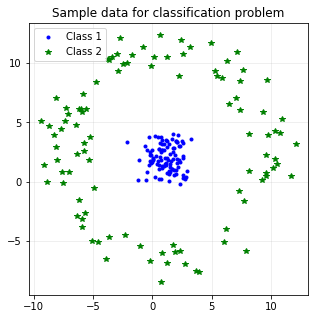

In [179]:
# Plot the data
fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
plt.legend(loc=2)
plt.axis('equal')
plt.show()

#### Split data into training and test datasets

In [180]:
idx = np.arange(0,len(X),1)
np.random.seed(555)
np.random.shuffle(idx)
idx_train = idx[0:int(.8*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(160, 2) (40, 2) (160, 1) (40, 1)


#### Normalization of data

In [181]:
# Normalization of data
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm

XX = normalization(X)
X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]
print(X_train_norm.shape,X_test_norm.shape)
# print(XX)

(160, 2) (40, 2)


#### Define class for logistic regression: batch gradient descent

In [182]:
# define class for logistic regression: batch gradient descent
class Logistic_BGD:
      
    def __init__(self):
        pass
    
#     def softmax(self, z):
#         z -= np.max(z)
#         return np.exp(z) / np.sum(np.exp(z))
    
#     def h(self, X, theta):
#         return self.softmax(np.dot(X,theta))

    def sigmoid(self,z):   
        return 1 / (1 + np.exp(-z))

    def h(self,X, theta):
        return self.sigmoid(X @ theta)
    
    def gradient(self, X, y, y_pred):
        m = len(y)
        return -1/m * np.dot(X.transpose(),(y - y_pred))
        
    def costFunc(self, theta, X, y):    
        m = len(y)    
        y_pred = self.h(X,theta)
        error = (-y * np.log(y_pred)) - ((1-y)*np.log(1-y_pred))
        cost = 1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)    
        return cost[0], grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        X = np.insert(X, 0, 1, axis=1)
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            cost, grad = self.costFunc(theta,X,y)
            theta = theta - alpha * grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        self.X_test=np.hstack((np.ones((X.shape[0],1)),X))
        for i in range(0,self.X_test.shape[0]):
            y1=self.h(self.X_test[i],self.theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
   
    def checkAccuracy(self,predicted,y):
        predicted=predicted.tolist()
        y = y.tolist()
        correct=0
        for i in range(0,len(predicted)):
            if y[i]==predicted[i]:
                correct+=1
        
        return (float(correct)/len(predicted))*100

#### Boundary plot

In [183]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2


## In lab exercises

1. Verify that the gradient descent solution given above is correct. Plot the optimal decision boundary
   you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


#### 1. Verify that the gradient descent solution given above is correct. Plot the optimal decision boundary you obtain.


(3, 1)
[[-1.13864472e-05]
 [-2.09240894e-02]
 [ 4.73318930e-02]]


Text(0.5, 1.0, 'Training cost over time with batch gradient descent (no normalization)')

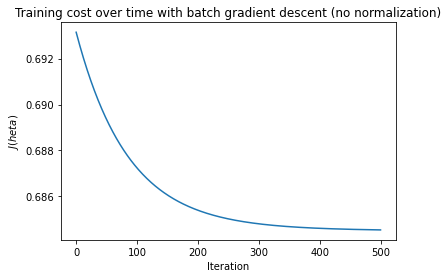

In [184]:
# Initializing theta
m,n = X_train_norm.shape
theta_initial = np.full((n+1, 1),0)
print(theta_initial.shape)

klass = Logistic_BGD()
alpha = 0.001
num_iters = 500

theta,J_history=klass.gradientAscent(X_train, y_train, theta_initial, alpha, num_iters)
print(theta)
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")

(200, 2)
(200, 2)


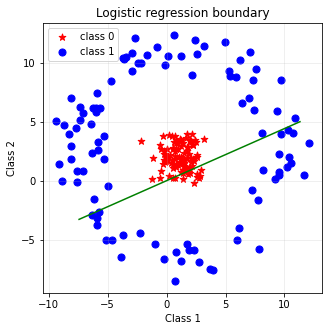

Got test set soft R^2 -0.0096, hard R^2 -0.4322, accuracy 0.65


In [185]:
idx_0 = np.where(y == 0)
# print('idx_0',idx_0)
print(X.shape)
idx_1 = np.where(y == 1)
# print('idx_1',idx_1)
print(X.shape)

fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Class 1')
plt.ylabel('Class 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[:,0][idx_0[0]], X[:,1][idx_0[0]], s=50, c='r', marker='*', label='class 0')
ax.scatter(X[:,0][idx_1[0]], X[:,1][idx_1[0]], s=50, c='b', marker='o', label='class 1')
point_1, point_2 = boundary_points(X, theta)
# print(X.shape)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()

klass = Logistic_BGD()
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

X_test_norm = np.insert(X_test_norm, 0, 1, axis=1)

y_test_pred_soft = klass.h(X_test_norm, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))


#### 2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

In [186]:
# define class for logistic regression: batch gradient descent
class Logistic_NEWTON():
      
    def __init__(self):
        pass

    def sigmoid(self,z):   
        return 1 / (1 + np.exp(-z))

    def h(self,X, theta):
        return self.sigmoid(X @ theta)
    
    def gradient(self, X, y, y_pred):
        m = len(y)
        return -1/m * np.dot(X.transpose(),(y - y_pred))
        
    def costFunc(self, theta, X, y):    
        m = len(y)    
        y_pred = self.h(X,theta)
        error = (-y * np.log(y_pred)) - ((1-y)*np.log(1-y_pred))
        cost = 1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)    
        return cost[0], grad
    
    def hessian(self,X,theta):
        hessian_matrix = []
        for j in range(theta.shape[0]):
            row = []
            for z in range(theta.shape[0]):
                jz = (-X[:,j]).reshape((-1,1)).T@self.h(X,theta)@(1-self.h(X,theta)).T@X[:,z]
                row.append(jz)
            hessian_matrix.append(row)
        hessian = np.array(hessian_matrix).reshape(theta.shape[0],theta.shape[0])
#         print(np.linalg.det(hessian))
        return hessian
    
    
    def newtonmethod(self, X, y, theta, num_iters):
        X = np.insert(X, 0, 1, axis=1)
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            cost, grad = self.costFunc(theta,X,y)
            theta = theta - np.linalg.pinv(self.hessian(X,theta))@ grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        X_test=np.hstack((np.ones((X.shape[0],1)),X))
        for i in range(0,X_test.shape[0]):
            y1=self.h(X_test[i],theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
   
    def checkAccuracy(self,predicted,y):
        predicted=predicted.tolist()
        y = list(map(int,y))
        correct=0
        for i in range(0,len(predicted)):
            if y[i]==predicted[i]:
                correct+=1
        
        return (float(correct)/len(predicted))*100

[[-2.76599378e-06]
 [-6.37816586e-08]
 [ 1.99218924e-08]]


Text(0.5, 1.0, 'Training cost over time with batch gradient descent (no normalization)')

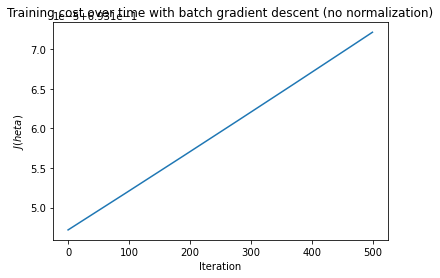

In [187]:
logNT = Logistic_NEWTON()

theta_initial = np.zeros(3).reshape((3,1))
# theta_initial = np.full((n+1, 1),0)
number_iters = 10000

op_theta_NT , cost_history = logNT.newtonmethod(X_train_norm,y_train,theta_initial,num_iters)
# print(X_train_norm.shape)
# print(op_theta_NT.shape)
print(op_theta_NT)
# print(cost_history)
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")

(40, 2)
(3, 1)


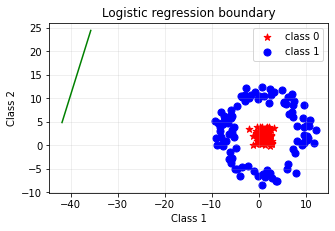

Got test set soft R^2 -0.0230, hard R^2 -0.7391, accuracy 0.57


In [188]:
idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

print(X_test.shape)
print(op_theta_NT.shape)
fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Class 1')
plt.ylabel('Class 2')
plt.grid(axis='both', alpha=.25)
# print(X_train[0])
ax.scatter(X[:,0][idx_0[0]], X[:,1][idx_0[0]], s=50, c='r', marker='*', label='class 0')
ax.scatter(X[:,0][idx_1[0]], X[:,1][idx_1[0]], s=50, c='b', marker='o', label='class 1')
point_1, point_2 = boundary_points(X, op_theta_NT)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()

klass = Logistic_BGD()
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

y_test_pred_soft = klass.h(X_test_norm, op_theta_NT)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

#### 3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

As shown above, the accuracy of the model using gradient descent and that of the model using Newton method are very similar.

#### 4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues with Newton's method such as a singular or nearly singular Hessian matrix?

With newton method, the graph converges faster, however, with this method the problem of matrix singularity is faced.

## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset.

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03.

## The report

Write a brief report covering your experiments (both in lab and take home) and send as a Jupyter notebook
to the TAs, Manish and Abhishek before the next lab.

In your solution, be sure to follow instructions.


#### 1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset.

(200, 1)
(200, 1)


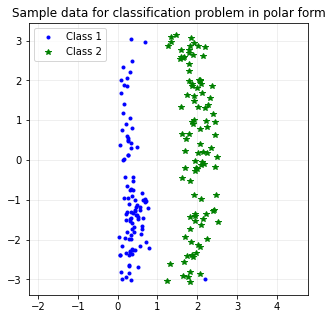

In [189]:
X1_mean = XX[:101,0].mean()
X2_mean = XX[101:,0].mean()
r1 = np.sqrt((XX[:101,0]-X1_mean)**2 + (XX[:101,1]-X1_mean)**2)
r2 = np.sqrt((XX[101:,0]-X2_mean)**2 + (XX[101:,1]-X2_mean)**2)
# print(r1.shape,r2.shape)
rrr = np.concatenate((r1,r2),axis = 0).reshape(-1,1)
print(rrr.shape)
angle1 = np.arctan2((XX[:101,1]-X1_mean),(XX[:101,0]-X1_mean))
angle2 = np.arctan2((XX[101:,1]-X2_mean),(XX[101:,0]-X2_mean))
angle_polar = np.concatenate((angle1,angle2), axis = 0).reshape(-1,1)
print(angle_polar.shape)
polar = np.concatenate((rrr,angle_polar), axis = 1)

fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title('Sample data for classification problem in polar form')
plt.grid(axis='both', alpha=.25)
plt.plot(r1,angle1,'b.', label = 'Class 1')
plt.plot(r2,angle2,'g*', label = 'Class 2')
plt.legend(loc=2)
plt.axis('equal')
plt.show()

(200, 2)
(3, 1)
[[-1.40063261]
 [ 1.74803402]
 [ 0.4093998 ]]


Text(0.5, 1.0, 'Training cost over time with batch gradient descent (no normalization)')

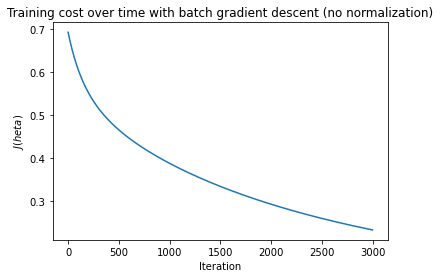

In [190]:
# Split data into training and test datasets
rr = polar
# rr = normalization(rr)
print(polar.shape)
# angles = np.concatenate([angle1,angle2],axis = 0)
# print(angles.shape)

# print(y)
# print(rr)
# print(angles)

idx = np.arange(0,len(X),1)
# np.random.seed(555)
np.random.shuffle(idx)
idx_train = idx[0:int(.8*len(X))]
idx_test = idx[len(idx_train):len(idx)]

polar_train = polar[idx_train]
polar_test = polar[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]
y_shuffle = y[idx]

# Initializing theta
m,n = polar_train.shape
theta_initial = np.full((n+1, 1),0)
print(theta_initial.shape)

klass = Logistic_BGD()
alpha = 0.005
num_iters = 3000

theta_r,J_history=klass.gradientAscent(polar_train, y_train, theta_initial, alpha, num_iters)
print(theta_r)
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")

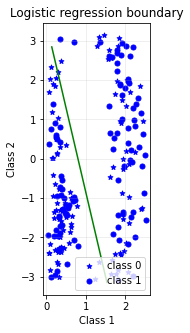

Got test set soft R^2 0.7293, hard R^2 0.7721, accuracy 0.95


In [191]:
idx_0 = np.where(y[idx] == 0)
idx_1 = np.where(y[idx] == 1)

fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Class 1')
plt.ylabel('Class 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(polar[:,0][idx_0[0]], polar[:,1][idx_0[0]], s=25, c='b', marker='*', label='class 0')
ax.scatter(polar[:,0][idx_1[0]], polar[:,1][idx_1[0]], s=25, c='b', marker='o', label='class 1')
point_1, point_2 = boundary_points(polar_test, theta_r)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()

klass = Logistic_BGD()

polar_test = np.insert(polar_test, 0, 1, axis=1)
y_test_pred_soft = klass.h(polar_test, theta_r)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

[[-6.53261946e-06]
 [-7.07787494e-06]
 [ 2.45071739e-06]]


Text(0.5, 1.0, 'Training cost over time with batch gradient descent (no normalization)')

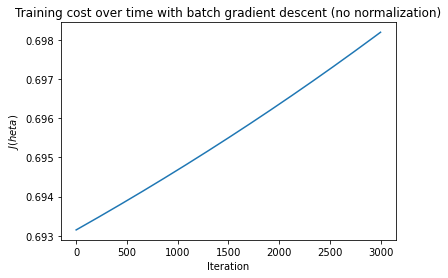

In [192]:
logNT = Logistic_NEWTON()

theta_initial_r = np.zeros(3).reshape((3,1))
# theta_initial = np.full((n+1, 1),0)
number_iters = 100

op_theta_NT_r , cost_history_r = logNT.newtonmethod(polar_train,y_train,theta_initial_r,num_iters)

print(op_theta_NT_r)
# print(cost_history)
plt.plot(cost_history_r)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")

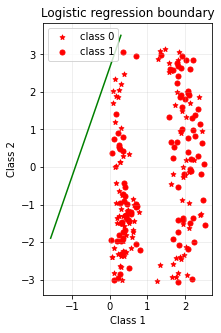

Got test set soft R^2 -0.1396, hard R^2 -2.0769, accuracy 0.33


In [193]:
idx_0 = np.where(y[idx] == 0)
idx_1 = np.where(y[idx] == 1)

polar_test = polar[idx_test]
# print(polar_test.shape)
fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Class 1')
plt.ylabel('Class 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(polar[:,0][idx_0[0]], polar[:,1][idx_0[0]], s=25, c='r', marker='*', label='class 0')
ax.scatter(polar[:,0][idx_1[0]], polar[:,1][idx_1[0]], s=25, c='r', marker='o', label='class 1')
point_1, point_2 = boundary_points(polar_test, op_theta_NT_r)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()

logNT = Logistic_NEWTON()
polar_test = np.insert(polar_test, 0, 1, axis=1)
y_test_pred_soft = logNT.h(polar_test,op_theta_NT_r)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

#### 2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method after the polar transformation

In [ ]:
After the polar transformation, the accuracy of the model, bo

#### 3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03.

In [194]:
import pandas as pd
import numpy as np
# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)


Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [195]:
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [196]:
print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()

print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values)) #ratio of married to all statuses

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [197]:
#Dependents
# Here we see that categorical values are all numeric except one value "3+" 
# Create a new category value "4" for "3+" and ensure that all the data is numeric

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)

data_train.isnull().sum()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [198]:
print(data_train['Gender'].value_counts())
gender = data_train['Gender'].value_counts()

print('Gender ratio Male ', gender['Male'] / sum(gender.values))
print('Gender ratio Female ', gender['Female'] / sum(gender.values))

def fill_gender_status(num_male_train, num_female_train, num_male_test, num_female_test):        
    data_train['Gender'].fillna('Male', inplace=True, limit = num_male_train)
    data_train['Gender'].fillna('Female', inplace=True, limit = num_female_train)
    data_test['Gender'].fillna('Male', inplace=True, limit = num_male_test)
    data_test['Gender'].fillna('Female', inplace=True, limit = num_female_test)

fill_gender_status(10,3,9,2 )

print(data_train['Gender'].value_counts())

data_train.isnull().sum()

Male      489
Female    112
Name: Gender, dtype: int64
Gender ratio Male  0.8136439267886856
Gender ratio Female  0.18635607321131448
Male      499
Female    115
Name: Gender, dtype: int64


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [199]:
#Self_Employed
print(data_train['Self_Employed'].value_counts())
self_empl = data_train['Self_Employed'].value_counts()

print('Self_Employed ratio', self_empl['Yes'] / sum(self_empl.values))
print('Non-Self_Employed ratio',self_empl['No'] / sum(self_empl.values))

def fill_self_empl_status(num_yes_train, num_no_train, num_yes_test, num_no_test):        
    data_train['Self_Employed'].fillna('Yes', inplace=True, limit = num_yes_train)
    data_train['Self_Employed'].fillna('No', inplace=True, limit = num_no_train)
    data_test['Self_Employed'].fillna('Yes', inplace=True, limit = num_yes_test)
    data_test['Self_Employed'].fillna('No', inplace=True, limit = num_no_test)

fill_self_empl_status(5,27,3,20)

print(data_train['Self_Employed'].value_counts())

data_train.isnull().sum()

No     500
Yes     82
Name: Self_Employed, dtype: int64
Self_Employed ratio 0.140893470790378
Non-Self_Employed ratio 0.8591065292096219
No     527
Yes     87
Name: Self_Employed, dtype: int64


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [200]:
#Credit_History
print(data_train['Credit_History'].value_counts())
cred_hist = data_train['Credit_History'].value_counts()

print('credit history ratio', cred_hist[1] / sum(cred_hist.values))
print('no credit history ratio',cred_hist[0] / sum(cred_hist.values))

def fill_cred_hist_status(num_yes_train, num_no_train, num_yes_test, num_no_test):        
    data_train['Credit_History'].fillna('1', inplace=True, limit = num_yes_train)
    data_train['Credit_History'].fillna('0', inplace=True, limit = num_no_train)
    data_test['Credit_History'].fillna('1', inplace=True, limit = num_yes_test)
    data_test['Credit_History'].fillna('0', inplace=True, limit = num_no_test)

fill_cred_hist_status(42,8,25,24)

print(data_train['Credit_History'].value_counts())

data_train.isnull().sum()
# data_test.isnull().sum()

1.0    475
0.0     89
Name: Credit_History, dtype: int64
credit history ratio 0.8421985815602837
no credit history ratio 0.15780141843971632
1.0    475
0.0     89
1       42
0        8
Name: Credit_History, dtype: int64


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [201]:
#LoanAmount
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)
data_train.isnull().sum()
# data_test.isnull().sum()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [202]:
#Loan_Amount_Term
print(data_train['Loan_Amount_Term'].value_counts())

LoanAmt = data_train['Loan_Amount_Term'].value_counts()

print('mean loan amount term', np.mean(data_train["Loan_Amount_Term"]))

loan_amount_term_mean = np.mean(data_train["Loan_Amount_Term"])

data_train['Loan_Amount_Term'].fillna(loan_amount_term_mean, inplace=True, limit = 14)
data_test['Loan_Amount_Term'].fillna(loan_amount_term_mean, inplace=True, limit = 6)
# data_train.isnull().sum()
# data_test.isnull().sum()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
mean loan amount term 342.0


In [203]:
print(data_train.isnull().sum())
print(data_test.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [204]:
def convert_vals(col,col_name,answer1, answer2 ,answer3):
    ixd_1 = np.where(data_train[col_name] == answer1)
    ixd_0 = np.where(data_train[col_name]== answer2)
    ixd_2 = np.where(data_train[col_name]== answer3)
    for i in ixd_1:
        data_train.iloc[i,col] = 1
    for i in ixd_0:
        data_train.iloc[i,col] = 0
    for i in ixd_2:
        data_train.iloc[i,col] = 2

convert_vals(1,'Gender','Male','Female','')
convert_vals(2,'Married','Yes','No','')
convert_vals(4,'Education','Graduate','Not Graduate','')
convert_vals(5,'Self_Employed','No','Yes','')
convert_vals(11,'Property_Area','Semiurban','Rural','Urban')
convert_vals(12,'Loan_Status','Y','N','')

cols = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

X = data_train[cols]
X = X.astype(float)
X = np.array(X)
# print(X)

Y = data_train['Loan_Status']
Y = Y.astype(float)
Y = np.array(Y)

In [205]:
X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)

X_norm = (X - X_mean)/X_std
X_norm

array([[ 0.48006346, -1.36717185, -0.6944511 , ...,  0.27985054,
         0.43315227,  1.22329839],
       [ 0.48006346,  0.73143694,  0.12239368, ...,  0.27985054,
         0.43315227, -1.31851281],
       [ 0.48006346,  0.73143694, -0.6944511 , ...,  0.27985054,
         0.43315227,  1.22329839],
       ...,
       [ 0.48006346,  0.73143694,  0.12239368, ...,  0.27985054,
         0.43315227,  1.22329839],
       [ 0.48006346,  0.73143694,  0.93923845, ...,  0.27985054,
         0.43315227,  1.22329839],
       [-2.08305795, -1.36717185, -0.6944511 , ...,  0.27985054,
        -2.30865695, -0.04760721]])

In [206]:
m, n = X.shape
print(X.shape)
# XX = np.insert(X_norm, 0, 1, axis=1)
# print(XX.shape)
# print(Y.shape)
Y = Y.reshape(m, 1)

(614, 11)


In [207]:
theta_initial_loan = np.full((n+1, 1),0) #dont not have to be 0s, != 0 can be roughly estimated from the plot 
theta_initial_loan

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

(614, 11)
[[-1.98725097e-06]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]


Text(0.5, 1.0, 'Training cost over time with batch gradient descent (no normalization)')

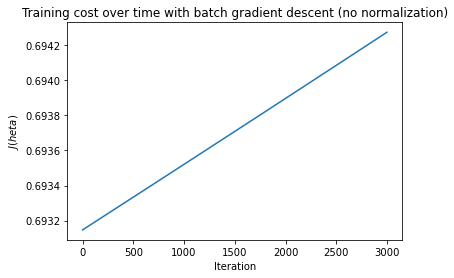

In [208]:
logNT = Logistic_NEWTON()

number_iters = 1
print(X_norm.shape)
op_theta_NT_loan , cost_history_loan = logNT.newtonmethod(X_norm,Y,theta_initial_loan,num_iters)
print(op_theta_NT_loan)
# print(cost_history)
plt.plot(cost_history_loan)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")

In [209]:
print(X_norm.shape)
print(theta.shape)
y_pred = logNT.predict(X_norm, op_theta_NT_loan)
acc = logNT.checkAccuracy(y_pred,Y)
print(acc)

(614, 11)
(3, 1)
31.27035830618892
